# Import Necessary Libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score

# Read DataSet

In [158]:
df = pd.read_csv('Sample_test_attempt_data.csv')
del df['subject']
df.head()

,accuracyRate % (correct/attempted),attemptRate% (attempted/total),studentId
0,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8
1,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8
2,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8
3,0.000000,0.000000,5ace5f3b9fe7b01d581ddef8
4,66.666667,33.333333,5ace5f3b9fe7b01d581ddef8


# Data is clean no null values

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13806 entries, 0 to 13805
Data columns (total 4 columns):
accuracyRate % (correct/attempted)    13806 non-null float64
attemptRate% (attempted/total)        13806 non-null float64
studentId                             13806 non-null object
subject                               13806 non-null object
dtypes: float64(2), object(2)
memory usage: 431.5+ KB


# Change studentID as index and find mean of each group


In [167]:
df = df.groupby(['studentId']).mean()
df.head()

,accuracyRate % (correct/attempted),attemptRate% (attempted/total)
studentId,,
5ace4ac29fe7b01d581808f5,40.712560,32.346939
5ace4ac69fe7b01d581809f1,78.219863,78.201058
5ace4ac89fe7b01d58180a48,64.951237,77.240741
5ace4acb9fe7b01d58180acc,74.872533,91.735639
5ace4acf9fe7b01d58180baa,69.487074,74.184618


# Seperate the column which we want to clusted based on

In [170]:
X = df.iloc[:,[0,1]].values
X

array([[40.71256039, 32.34693877],
       [78.21986272, 78.2010582 ],
       [64.95123695, 77.24074074],
       ...,
       [17.77777778,  8.29081633],
       [22.60504202, 20.99395314],
       [67.38938219, 86.8159486 ]])

# Find Optimal number of clustering using Elbow Method

5 is optimal number of cluster


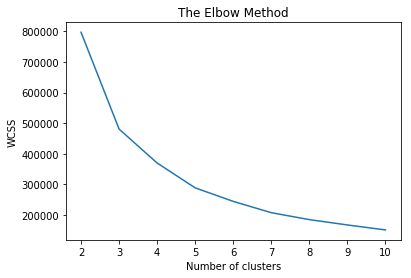

In [172]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print('5 is optimal number of cluster')
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting the Kmeans Alogrithm and plotting distribution

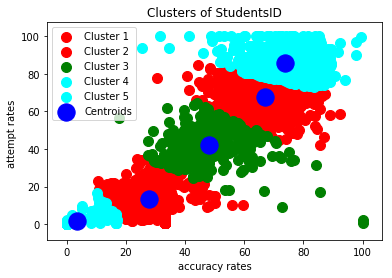

In [174]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Blue', label = 'Centroids')
plt.title('Clusters of StudentsID')
plt.xlabel('accuracy rates')
plt.ylabel('attempt rates ')
plt.legend()
plt.show()